<a href="https://colab.research.google.com/github/matinmoezzi/ebola-virus-ode-dnn/blob/main/solve%20ODE%20using%20Lagaris%20NN%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import jax.numpy as np
from jax import random, grad, vmap, jit

In [ ]:
def sigmoid(x):
    return 1./(1. + np.exp(-x))

def f(params, x):
    w0 = params[:10]
    b0 = params[10:20]
    w1 = params[20:30]
    b1 = params[30]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

In [ ]:
@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    return np.mean(eq**2) + ic**2

@jit
def loss2(params, inputs):
  eq = d2f_vect(params, inputs) + dfdx_vect(params, inputs)
  ic1 = f(params, 0.) - 2.
  ic2 = dfdx(params, 0.) - 3.
  return np.mean(eq**2) + ic1**2 + ic2**2



In [ ]:
params=random.normal(random.PRNGKey(0), shape=(31,))
dfdx = grad(f, 1)
d2f = grad(dfdx, 1)
f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))
d2f_vect = vmap(d2f, (None, 0))
grad_loss = jit(grad(loss, 0))

In [ ]:
inputs = np.linspace(-2., 2., num=401)

In [ ]:
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 0.954726
epoch: 100 loss: 0.061131
epoch: 200 loss: 0.024128
epoch: 300 loss: 0.008868
epoch: 400 loss: 0.003202
epoch: 500 loss: 0.001567
epoch: 600 loss: 0.000880
epoch: 700 loss: 0.000505
epoch: 800 loss: 0.000306
epoch: 900 loss: 0.000224


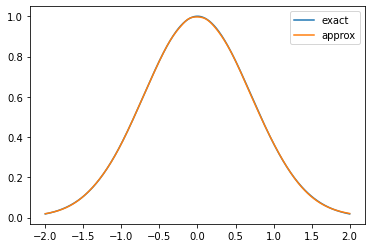

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(inputs, (3/2)*np.exp(inputs**2) - (1/2), label='exact')
plt.plot(inputs, np.exp(-inputs**2), label='exact')
plt.plot(inputs, f_vect(params, inputs), label='approx')
plt.legend()
plt.show()

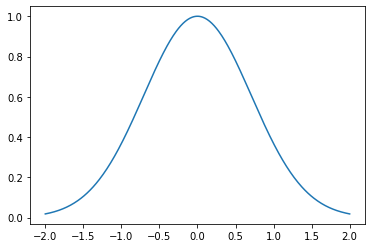

In [ ]:
plt.plot(inputs, np.exp(-inputs**2), label='exact')
plt.show()